In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('a.csv')

In [4]:
df['date']=df['Unnamed: 0']

In [5]:
df[df.groupby(['date'])['High'].transform(max) == df['High']]

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,date
0,2022-04-04 00:00:00+01:00,1.310461,1.310753,1.309792,1.310461,1.310461,0,2022-04-04 00:00:00+01:00
1,2022-04-04 01:00:00+01:00,1.310547,1.311510,1.310376,1.311355,1.311355,0,2022-04-04 01:00:00+01:00
2,2022-04-04 02:00:00+01:00,1.311424,1.311785,1.310582,1.311063,1.311063,0,2022-04-04 02:00:00+01:00
3,2022-04-04 03:00:00+01:00,1.311303,1.311510,1.310771,1.310977,1.310977,0,2022-04-04 03:00:00+01:00
4,2022-04-04 04:00:00+01:00,1.311303,1.312043,1.310856,1.311561,1.311561,0,2022-04-04 04:00:00+01:00
...,...,...,...,...,...,...,...,...
2836,2022-09-16 03:00:00+01:00,1.146526,1.146605,1.145436,1.146014,1.146014,0,2022-09-16 03:00:00+01:00
2837,2022-09-16 04:00:00+01:00,1.145974,1.146973,1.145620,1.145909,1.145909,0,2022-09-16 04:00:00+01:00
2838,2022-09-16 05:00:00+01:00,1.146381,1.147052,1.146224,1.146500,1.146500,0,2022-09-16 05:00:00+01:00
2839,2022-09-16 06:00:00+01:00,1.146197,1.146395,1.146197,1.146395,1.146395,0,2022-09-16 06:00:00+01:00


In [26]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,y,ds
0,2022-04-04 00:00:00+01:00,1.310461,1.310753,1.309792,1.310461,1.310461,0,1.310461,2022-04-04
1,2022-04-04 01:00:00+01:00,1.310547,1.311510,1.310376,1.311355,1.311355,0,1.311355,2022-04-04
2,2022-04-04 02:00:00+01:00,1.311424,1.311785,1.310582,1.311063,1.311063,0,1.311063,2022-04-04
3,2022-04-04 03:00:00+01:00,1.311303,1.311510,1.310771,1.310977,1.310977,0,1.310977,2022-04-04
4,2022-04-04 04:00:00+01:00,1.311303,1.312043,1.310856,1.311561,1.311561,0,1.311561,2022-04-04


<AxesSubplot:>

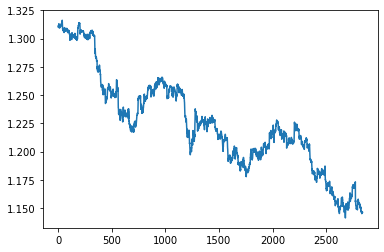

In [32]:
df['y'].plot()

In [23]:
df['ds'] = df.iloc[:, 0]

In [5]:
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [25]:
df['ds'] = df.ds.apply(lambda x: x.split(' ', 1)[0])

In [27]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
480,2023-09-12
481,2023-09-13
482,2023-09-14
483,2023-09-15
484,2023-09-16


In [29]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
480,2023-09-12,0.483645,-5.701437,6.554477
481,2023-09-13,0.481008,-5.719738,6.572507
482,2023-09-14,0.480094,-5.755279,6.590868
483,2023-09-15,0.477467,-5.790567,6.614601
484,2023-09-16,0.475725,-5.826942,6.652798


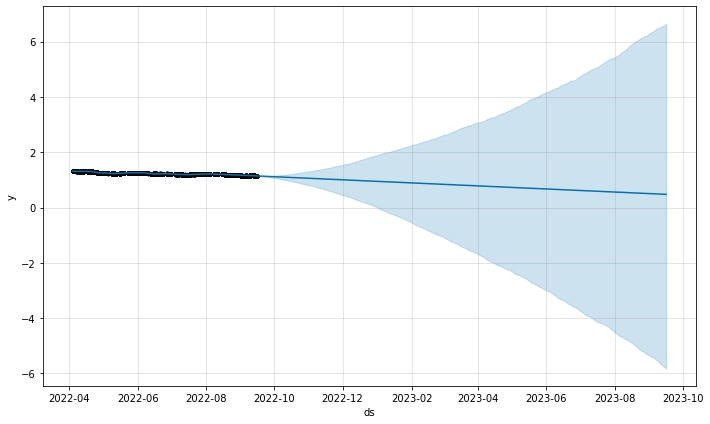

In [30]:
fig1 = m.plot(forecast)


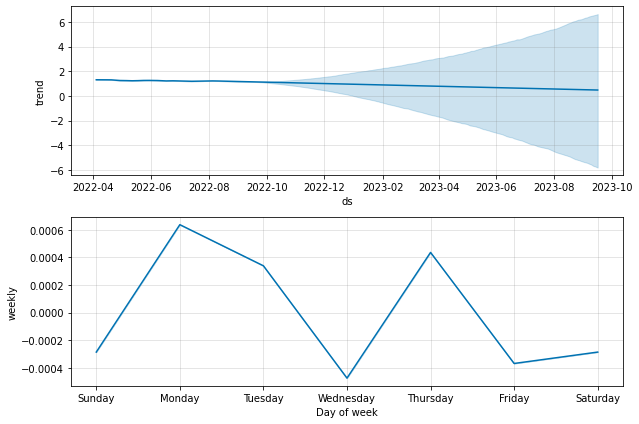

In [31]:
fig2 = m.plot_components(forecast)


In [39]:
# Python
df['cap'] = 1.5
df['floor'] = 0.5
future['cap'] = 1.5
future['floor'] = 0.5

# Python
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:


m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ValueError: Expected column "floor".

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

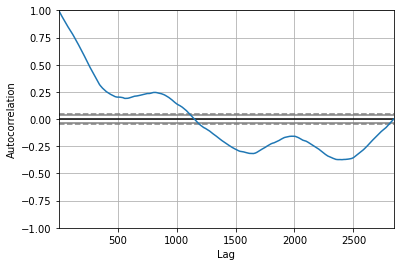

In [4]:
pd.plotting.autocorrelation_plot(data)

In [5]:
# https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/
# Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.205036
p-value: 0.671426
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


<AxesSubplot:>

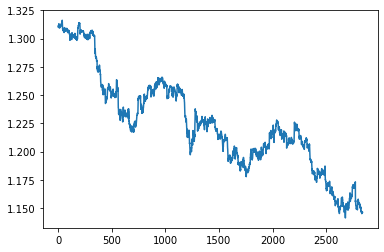

In [6]:
# Here it is visible that the data is not stationary and requires differentiation. 
data.plot()

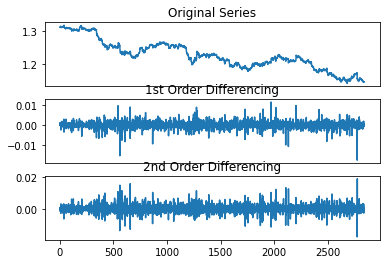

In [7]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data); ax1.set_title('Original Series'); 
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.diff()); ax2.set_title('1st Order Differencing'); 
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.diff().diff()); 
ax3.set_title('2nd Order Differencing')
plt.show()

In [9]:
# Here we can see how the time series has become stationary. 
# first-order differencing fewer noises in the data
# after 1st order there is an increase in the noise. 
# So we can select 1st order differencing for our model. We can also verify this using 
# an autocorrelation plot. 

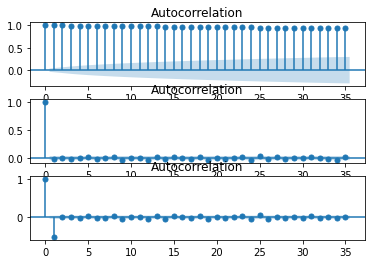

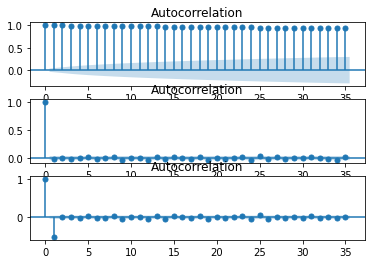

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data, ax=ax1)
plot_acf(data.diff().dropna(), ax=ax2)
plot_acf(data.diff().diff().dropna(), ax=ax3)

In [ ]:
#we are going to find the optimal value of p which is our number of autoregressive terms.
#We can find this value by inspecting the PACF plot.

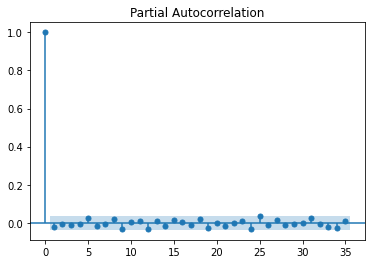

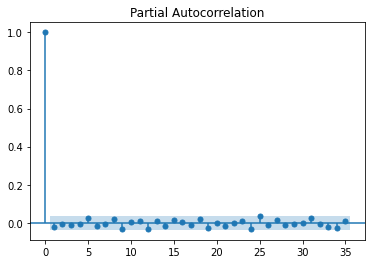

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.diff().dropna())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order = (25,1,5))
model_fit = model.fit(disp=0)
model_fit.summary()

/home/ifte-home/venvs/experiments/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


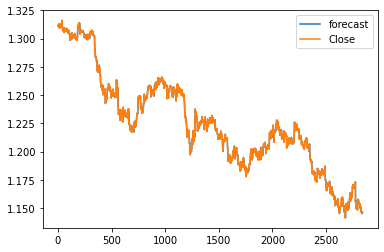

In [18]:
model_fit.plot_predict(dynamic=False)
plt.show()